# Example Out-of-Framework file
This file demonstrates how one can access the modules at different levels of abstraction (highest: access via MnistExperiment, lowest: MnistDataset)
## Analysis of MNIST

### Access via MnistExperiment

In [1]:
import os
from src.datasets.mnist_dataset import MnistDataset, MnistDatasetArgs
from src.args.yaml_config import YamlConfig
yaml_config = YamlConfig()
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
from src.experiments.mnist_experiment import MnistExperiment, MnistExperimentArgs






/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [ ]:
ex = MnistExperiment(MnistExperimentArgs(hidden_sizes=[64], experiment_id="mnist", use_cuda=False).model_dump(), yaml_config.config)

train = ex._create_dataset("train")
val = ex._create_dataset("val")
test = ex._create_dataset("test")

sample = train[0]

plt.imshow(sample.input.view(28,28).cpu().numpy())
plt.title(f"Label: {sample.target.argmax().item()}")
plt.show()

Text(0, 0.5, 'N samples')

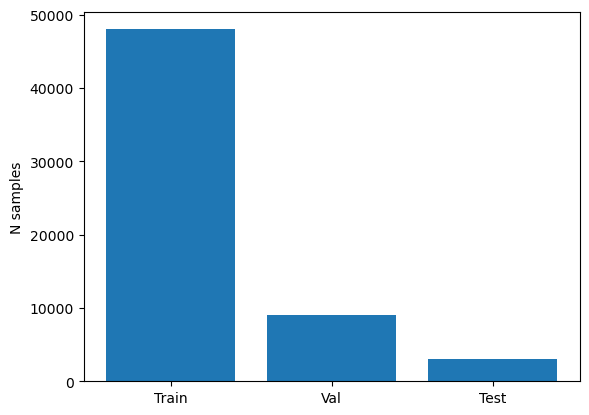

In [5]:
plt.bar(["Train", "Val", "Test"],[len(train), len(val), len(test)])
plt.ylabel("N samples")

### Access via MnistDataset module

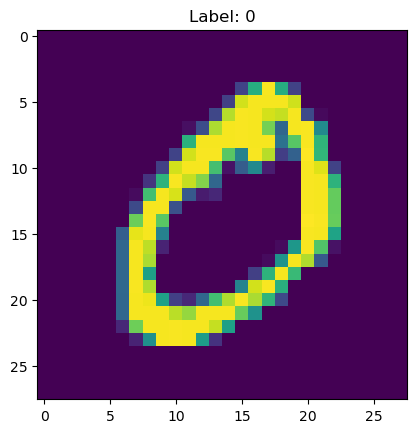

In [10]:
mnist_data = MNIST(
    os.path.join(yaml_config.config.cache_dir, "mnist"),
    download=True,
)

config = MnistDatasetArgs()
train = MnistDataset(mnist_data, config, yaml_config.config, "train")
val = MnistDataset(mnist_data, config, yaml_config.config, "val")
test = MnistDataset(mnist_data, config, yaml_config.config, "test")

sample = train[1]

plt.imshow(sample.input.view(28,28).cpu().numpy())
plt.title(f"Label: {sample.target.argmax().item()}")
plt.show()

Text(0, 0.5, 'N samples')

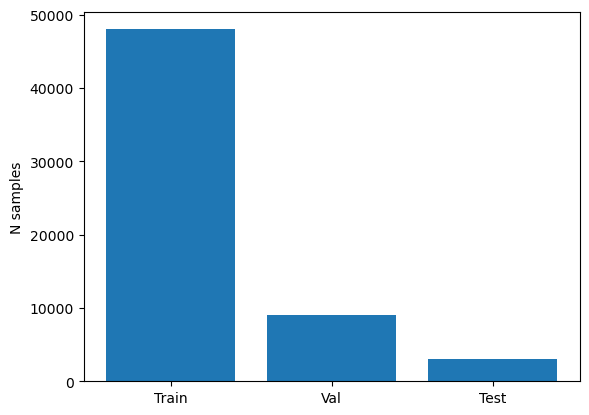

In [13]:
plt.bar(["Train", "Val", "Test"],[len(train), len(val), len(test)])
plt.ylabel("N samples")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9809059..2.2184875].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


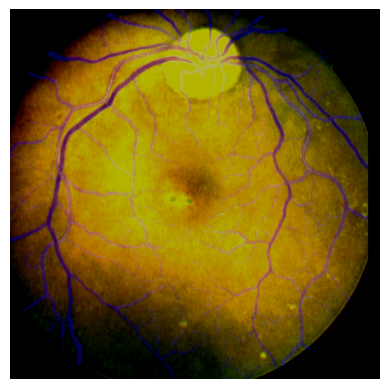

In [ ]:
from src.datasets.drive_dataset import DriveDataset, DriveDatasetArgs
from src.args.yaml_config import YamlConfig
import cv2
import numpy as np
import torch
yaml_config = YamlConfig()
config = DriveDatasetArgs()
ds = DriveDataset(config, yaml_config.config)
sample = ds[1]

image = sample.input.permute(1,2,0).cpu().numpy()
alpha = 0.3  # Transparency level for the mask
mask_color = [255, 0, 0] 
mask = sample.target

overlay = np.zeros_like(image)
overlay[mask == 1] = [0, 0, 255]

plt.imshow(image)
plt.imshow(overlay, alpha=alpha)
plt.axis('off')
plt.show()

In [47]:
import kagglehub

path = kagglehub.dataset_download("khoongweihao/chasedb1", path = yaml_config.config.cache_dir)

/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KaggleApiHTTPError: 404 Client Error.

Resource not found at URL: https://www.kaggle.com/datasets/khoongweihao/chasedb1/versions/1
Please make sure you specified the correct resource identifiers.

In [ ]:
from src.datasets.refuge_dataset import RefugeDataset, RefugeDatasetArgs
from src.args.yaml_config import YamlConfig

yaml_config = YamlConfig()
config = RefugeDatasetArgs(target="disc")
ds = RefugeDataset(config, yaml_config.config)
sample = ds[1]

plt.imshow(sample.input.view(28,28).cpu().numpy())
plt.title(f"Label: {sample.target.argmax().item()}")
plt.show()

NameError: name 'plt' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2489083].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


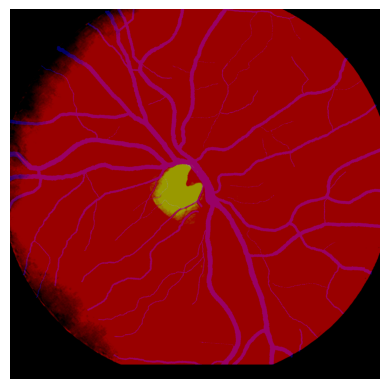

In [ ]:
from src.datasets.chasedb1_dataset import ChaseDb1Dataset, ChaseDb1DatasetArgs
from src.args.yaml_config import YamlConfig
import cv2
import numpy as np
import torch
yaml_config = YamlConfig()
config = ChaseDb1DatasetArgs()
ds = ChaseDb1Dataset(config, yaml_config.config)
sample = ds[4]

image = sample.input.permute(1,2,0).cpu().numpy()
alpha = 0.4  # Transparency level for the mask
mask_color = [255, 0, 0] 
mask = sample.target

overlay = np.zeros_like(image)
overlay[mask == 1] = [0, 0, 255]

plt.imshow(image)
plt.imshow(overlay, alpha=alpha)
plt.axis('off')
plt.show()

In [5]:
from src.experiments.ukbiobank_experiment import UkBioBankExperiment, UkBiobankExperimentArgs
from src.args.yaml_config import YamlConfig
import matplotlib.pyplot as plt

yaml_config = YamlConfig()
config = UkBiobankExperimentArgs(sam_model="vit_b", experiment_id="uk_biobank", drive_test_equals_val=False)
exp = UkBioBankExperiment(config.model_dump(), yaml_config.config)

train = exp._create_dataset("train")
val = exp._create_dataset("val")
test = exp._create_dataset("test")

# Display samples sizes as hist
lens = {
    "train": len(train), 
    "val": len(val),
    "test": len(test)
}
lens

/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/pydantic/main.py:292: UserWarning: Pydantic serializer warnings:
  Expected `float` but got `int` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(
/dhc/home/tobias.fiedler/mp-lippert-experiments/src/models/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializati

ImageNet pretrained weights for HarDNet68 is loaded


/dhc/home/tobias.fiedler/mp-lippert-experiments/src/models/auto_sam_prompt_encoder/hardnet.py:228: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.l

{'train': 83414, 'val': 15, 'test': 14}

In [2]:
from pydantic import BaseModel

class A(BaseModel):
    a: int = 69 

class B(BaseModel):
    a: int


class C(A,B):
    pass

C().a

69

/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5311428..7.856176].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


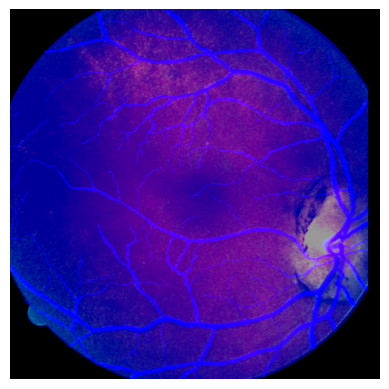

In [ ]:
from src.datasets.joined_retina_dataset import JoinedRetinaDataset, JoinedRetinaDatasetArgs
from src.args.yaml_config import YamlConfig
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
yaml_config = YamlConfig().config
config = JoinedRetinaDatasetArgs(drive_test_equals_val=False)
ds = JoinedRetinaDataset.from_config(config, yaml_config)
sample = ds[4]

image = sample.input.permute(1,2,0).cpu().numpy()
alpha = 0.4  # Transparency level for the mask
mask_color = [255, 0, 0] 
mask = sample.target

overlay = np.zeros_like(image)
overlay[mask == 1] = [0, 0, 255]

plt.imshow(image)
plt.imshow(overlay, alpha=alpha)
plt.axis('off')
plt.show()

In [ ]:
widths, heights, ds_label = [], [], []
for i in range(len(ds)):
    sample = ds[i]
    widths.append(sample.original_size[0].detach().item())
    heights.append(sample.original_size[1].detach().item())
    ds_label.append("ground_truth")

from src.datasets.ukbiobank_dataset import UkBiobankDataset, UkBiobankDatasetArgs
from src.args.yaml_config import YamlConfig
import random

yaml_config = YamlConfig()
config = UkBiobankDatasetArgs()
biobank_ds = UkBiobankDataset(config, yaml_config.config)

random_indices = random.sample(range(len(biobank_ds)), 1000)
for i in random_indices:
    widths.append(sample.original_size[0].detach().item())
    heights.append(sample.original_size[1].detach().item())
    ds_label.append("biobank (1000 random samples)")


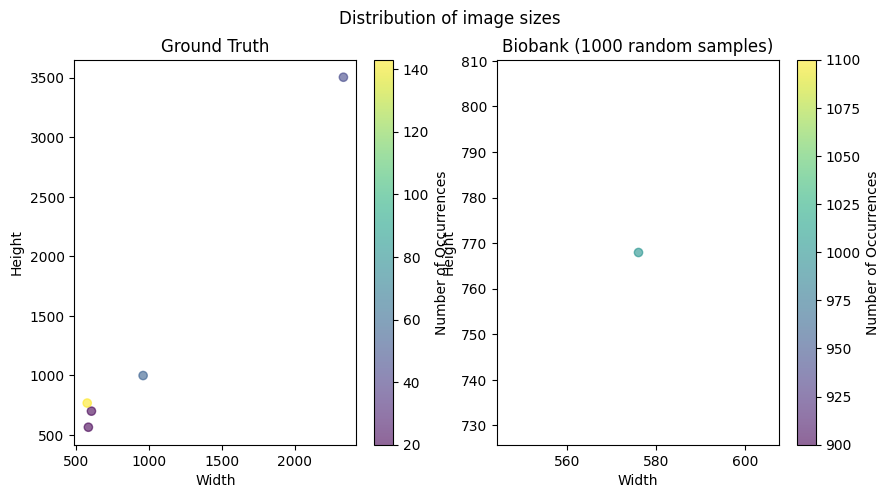

In [22]:
from collections import Counter
import matplotlib.pyplot as plt
# plot distribution of widths and heights as two subplots
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle("Distribution of image sizes")

# Scatter plot for widths and heights for ground_truth
# Count occurrences of each (width, height) pair
size_counts_gt = Counter(zip([w for w, d in zip(widths, ds_label) if d == "ground_truth"], 
                             [h for h, d in zip(heights, ds_label) if d == "ground_truth"]))

# Extract widths, heights, and their counts
unique_widths_gt, unique_heights_gt, counts_gt = zip(*[(w, h, c) for (w, h), c in size_counts_gt.items()])

# Scatter plot for widths and heights with marker size based on counts
# Define a colormap
cmap = plt.get_cmap("viridis")

# Normalize counts for colormap
norm = plt.Normalize(vmin=min(counts_gt), vmax=max(counts_gt))

# Scatter plot for widths and heights with marker size and color based on counts
sc_gt = axs[ 0].scatter(unique_widths_gt, unique_heights_gt, c=counts_gt, cmap=cmap, alpha=0.6)
axs[ 0].set_title("Ground Truth")
axs[ 0].set_xlabel("Width")
axs[ 0].set_ylabel("Height")

# Add colorbar
cbar_gt = plt.colorbar(sc_gt, ax=axs[ 0])
cbar_gt.set_label('Number of Occurrences')

# Count occurrences of each (width, height) pair
size_counts_biobank = Counter(zip([w for w, d in zip(widths, ds_label) if d == "biobank (1000 random samples)"], 
                                  [h for h, d in zip(heights, ds_label) if d == "biobank (1000 random samples)"]))

# Extract widths, heights, and their counts
unique_widths_biobank, unique_heights_biobank, counts_biobank = zip(*[(w, h, c) for (w, h), c in size_counts_biobank.items()])

# Normalize counts for colormap
norm_biobank = plt.Normalize(vmin=min(counts_biobank), vmax=max(counts_biobank))

# Scatter plot for widths and heights with marker size and color based on counts
sc_biobank = axs[ 1].scatter(unique_widths_biobank, unique_heights_biobank, c=counts_biobank, cmap=cmap, alpha=0.6)
axs[ 1].set_title("Biobank (1000 random samples)")
axs[ 1].set_xlabel("Width")
axs[ 1].set_ylabel("Height")

# Add colorbar
cbar_biobank = plt.colorbar(sc_biobank, ax=axs[ 1])
cbar_biobank.set_label('Number of Occurrences')

Text(0, 0.5, 'N samples')

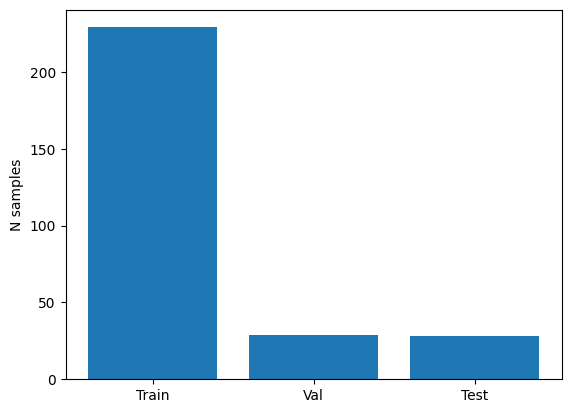

In [ ]:
train, val, test = ds.get_split("train"), ds.get_split("val"), ds.get_split("test")
plt.bar(["Train", "Val", "Test"],[len(train), len(val), len(test)])
plt.ylabel("N samples")

In [7]:
from src.datasets.aria_dataset import ARIADataset


aria = ARIADataset(config=config, yaml_config=yaml_config)
len(aria)

143

/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Joined Train Size 229


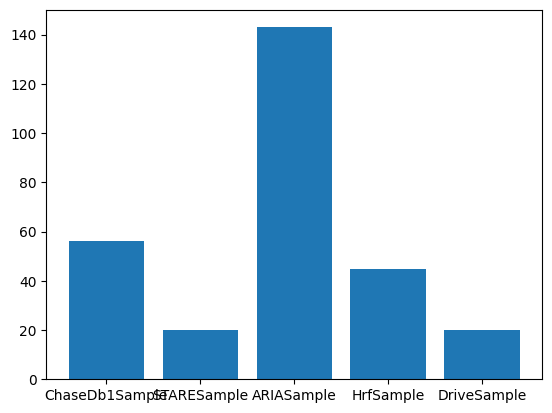

In [ ]:
from src.datasets.joined_retina_dataset import JoinedRetinaDataset, JoinedRetinaDatasetArgs
from src.args.yaml_config import YamlConfig
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from collections import Counter
yaml_config = YamlConfig().config
config = JoinedRetinaDatasetArgs(drive_test_equals_val=False)
ds = JoinedRetinaDataset.from_config(config, yaml_config, seed=42)


sample_type = [type(s).__name__ for s in ds]
c = Counter(sample_type)
# plot hist
plt.bar(c.keys(), c.values())

print("Joined Train Size", len(ds.get_split("train")))



In [6]:
from pathlib import Path


experiment_name = "multi_ds_vessel_experiment"
subdir = "prefinetuning_20samples"
Path("results")/experiment_name/subdir


PosixPath('results/multi_ds_vessel_experiment/prefinetuning_20samples')

<Axes: xlabel='n_samples', ylabel='test_IoU'>

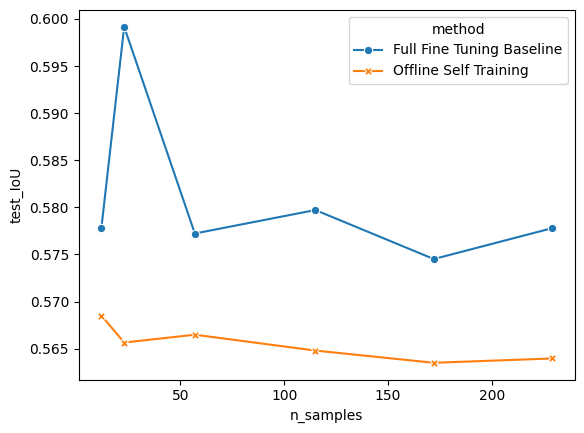

In [2]:
import pandas as pd


csv_df = pd.read_csv("wb_export.csv")
csv_df = csv_df[[col for col in csv_df.columns if col.endswith('test_IoU')]]


data = []
for col in csv_df.columns:
    method = "Full Fine Tuning Baseline"if "NoST" in col else "Offline Self Training"
    n_samples = col.replace("vessels_gt_NoST_fft_", "").replace("vessels_gt_OfflineST_fft_","").split("_")[0]
    n_samples = int(n_samples) if n_samples != "all" else 229
    
    test_IoU = csv_df[col].item()

    data.append({"method": method, "n_samples": n_samples, "test_IoU": test_IoU})

df = pd.DataFrame(data)
# plot line chart with one line per method and n_samples on x axis
import seaborn as sns
sns.lineplot(data=df, x="n_samples", y="test_IoU", hue="method", markers=True, style="method", dashes=False)


<Axes: xlabel='n_samples', ylabel='test_IoU'>

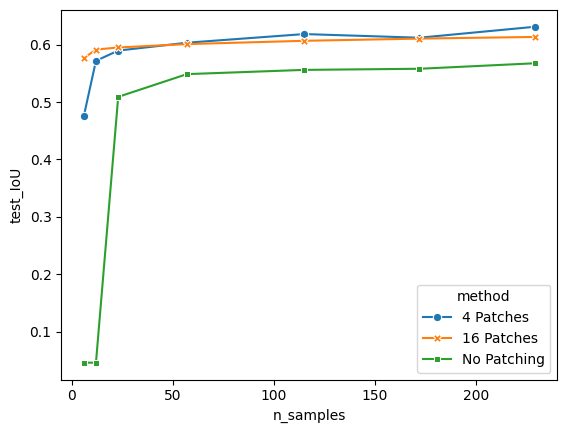

In [1]:
import pandas as pd


csv_df = pd.read_csv("wb_export_baseline.csv")
csv_df = csv_df[[col for col in csv_df.columns if col.endswith('test_IoU')]]


data = []
for col in csv_df.columns:
    method = "4 Patches" if "patched4" in col else "16 Patches" if "patched16" in col else "No Patching"
    n_samples = col.replace("_samples_aug - test_IoU", "").split("_")[-1]
    n_samples = int(n_samples) if n_samples != "all" else 229
    
    test_IoU = csv_df[col].item()

    data.append({"method": method, "n_samples": n_samples, "test_IoU": test_IoU})

df = pd.DataFrame(data)
# plot line chart with one line per method and n_samples on x axis
import seaborn as sns
sns.lineplot(data=df, x="n_samples", y="test_IoU", hue="method", markers=True, style="method", dashes=False)

<Axes: xlabel='n_samples', ylabel='test_dice_score'>

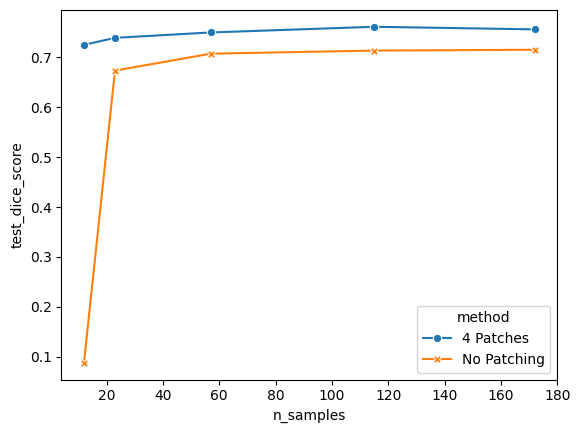

In [7]:
import pandas as pd


csv_df = pd.read_csv("wb_export_baseline_dice.csv")
csv_df = csv_df[[col for col in csv_df.columns if col.endswith('test_dice_score')]]


data = []
for col in csv_df.columns:
    method = "4 Patches" if "patched4" in col else "16 Patches" if "patched16" in col else "No Patching"
    n_samples = col.replace("_samples_aug - test_dice_score", "").split("_")[-1]
    n_samples = int(n_samples) if n_samples != "all" else 229
    
    test_IoU = csv_df[col].item()

    data.append({"method": method, "n_samples": n_samples, "test_dice_score": test_IoU})

df = pd.DataFrame(data)
# plot line chart with one line per method and n_samples on x axis
import seaborn as sns
sns.lineplot(data=df, x="n_samples", y="test_dice_score", hue="method", markers=True, style="method", dashes=False)

In [1]:
from typing import cast
from src.datasets.joined_patched_retina_dataset import JoinedPatchedRetinaDataset, PatchedVesselSample
from src.datasets.joined_retina_dataset import JoinedRetinaDataset
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def plot_sample_origin(split_key, ds: JoinedRetinaDataset| JoinedPatchedRetinaDataset):
    is_patched= isinstance(ds,JoinedPatchedRetinaDataset)
    limits = [l * 4 if is_patched else l for l in [12, 23, 57, 115,172, 229]] if split_key == "train" else ["all"]
    data = {}
    
    def extract_name(sample):
        if is_patched:
            return cast(PatchedVesselSample,sample).origin_dataset
        return type(sample).__name__
        
    for limit in limits:
        split = ds.get_split(split_key, limit_samples=limit if limit != "all" else None)    
        sample_type = [extract_name(s) for s in split]
        c = Counter(sample_type)
        data[limit] = c

    # Create a bar plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Sort limits in descending order
    sorted_limits = sorted(limits, reverse=True) if split_key == "train" else limits

    # Define colors for each limit using a different colormap
    colors = plt.cm.tab20(np.linspace(0, 1, len(sorted_limits), endpoint=False))

    # Plot bars for each limit
    for i, limit in enumerate(sorted_limits):
        counts = data[limit]
        sorted_keys = sorted(counts.keys())
        ax.bar(sorted_keys, [counts[k] for k in sorted_keys], color=colors[i], alpha=0.6, label=f'Limit {limit}')

    ax.set_xlabel('Dataset')
    ax.set_ylabel('Number of Samples')
    ax.set_title(f'N samples in {split_key} split of {"Patched" if is_patched else ""} Retina Dataset')
    ax.legend()

    # Add horizontal gridlines in steps of 5
    ax.yaxis.set_major_locator(plt.MultipleLocator(5))
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()


/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
from src.datasets.joined_retina_dataset import JoinedRetinaDataset, JoinedRetinaDatasetArgs
from src.args.yaml_config import YamlConfig
yaml_config = YamlConfig().config
config = JoinedRetinaDatasetArgs(drive_test_equals_val=False)
ds = JoinedRetinaDataset.from_config(config, yaml_config, seed=42)

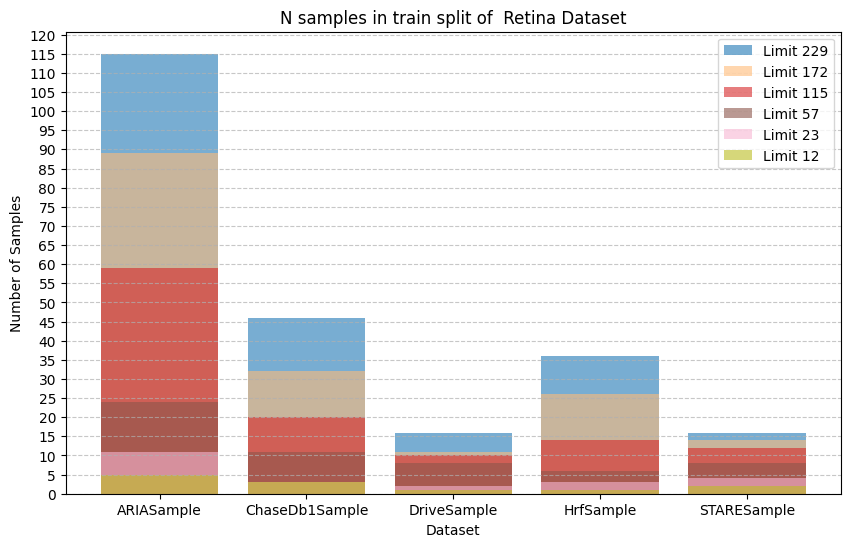

In [4]:
plot_sample_origin("train", ds)

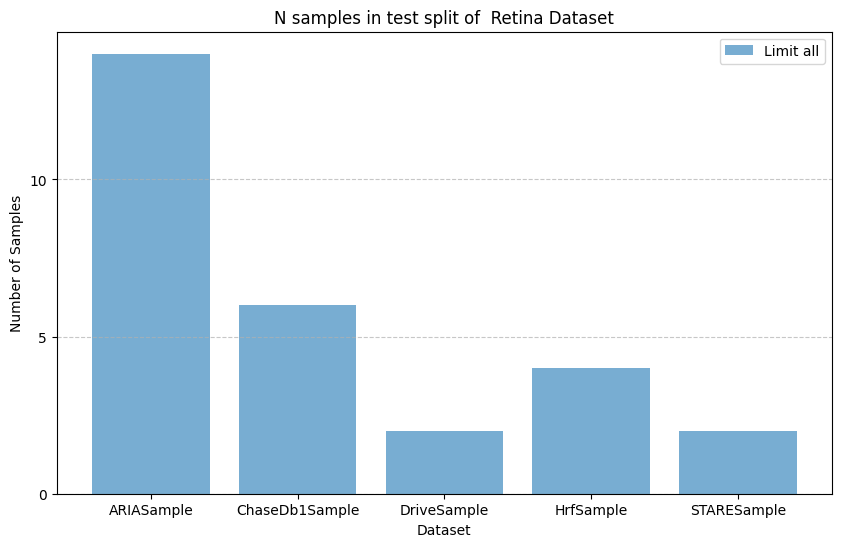

In [5]:
plot_sample_origin("test",ds)

In [ ]:
from src.args.yaml_config import YamlConfig
yaml_config = YamlConfig().config
from src.datasets.joined_patched_retina_dataset import JoinedPatchedRetinaDataset, PatchedVesselSample
from src.datasets.joined_retina_dataset import  JoinedRetinaDatasetArgs
from typing import cast

config = JoinedRetinaDatasetArgs(drive_test_equals_val=False, augment_train=False)
patched_ds = JoinedPatchedRetinaDataset.from_config(config, yaml_config, seed=42, patches=16)

/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
train_ds = patched_ds.get_split("train", limit_samples=6 * 16)

total = 0
unique_origin_sample_idx = set()
unique_intra_sample_idx = set()
unqique_patches = set()
for s in train_ds:
    s = cast(PatchedVesselSample, s)
    unique_origin_sample_idx.add(s.origin_sample_idx)
    unique_intra_sample_idx.add(s.intra_sample_idx)
    unqique_patches.add(f"{s.origin_sample_idx}_{s.intra_sample_idx}")
    total += 1

print(
    "total samples: ",
    total,
    "sample origins: ",
    len(unique_origin_sample_idx),
    "intra samples: ",
    len(unique_intra_sample_idx),
    "unique patches: ",
    len(unqique_patches),
)

total samples:  96 sample origins:  6 intra samples:  16 unique patches:  96


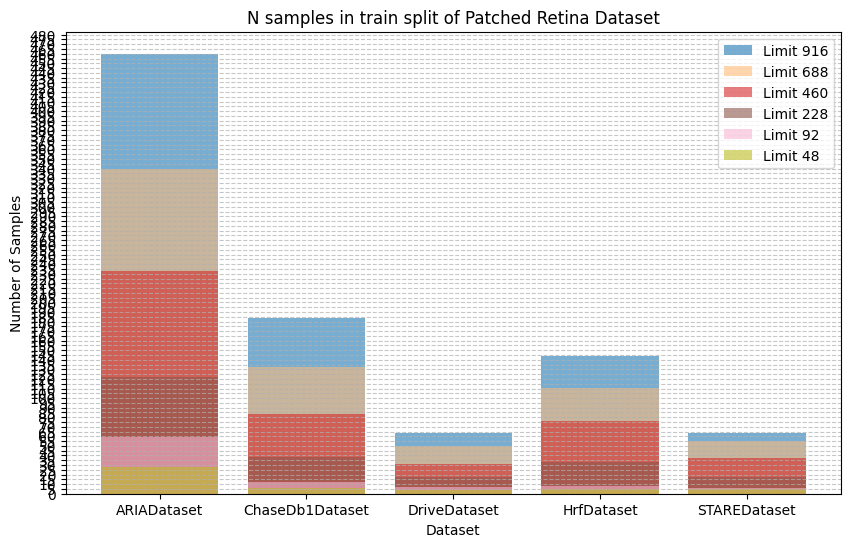

In [3]:
plot_sample_origin("train", patched_ds)

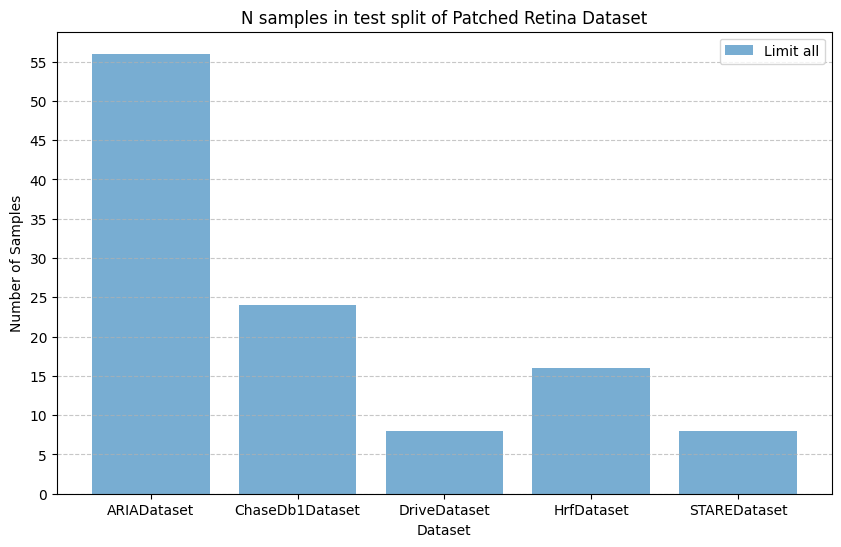

In [4]:
plot_sample_origin("test", patched_ds)

HrfDataset


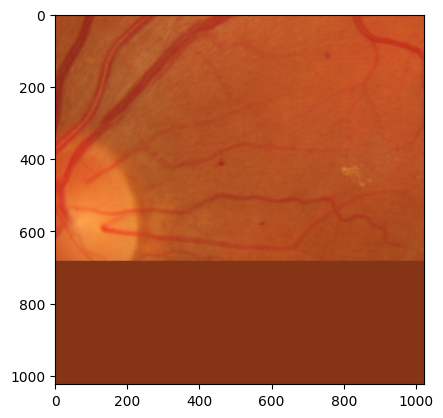

In [9]:
from src.models.segment_anything.utils.transforms import ResizeLongestSide

patched_sample = patched_ds[3]
print(patched_sample.origin_dataset)
pixel_mean, pixel_std = (
            yaml_config.fundus_pixel_mean,
            yaml_config.fundus_pixel_std,
        )
sam_trans = ResizeLongestSide(
    yaml_config.fundus_resize_img_size,
    pixel_mean=pixel_mean,
    pixel_std=pixel_std,
)

unnorm_img = sam_trans.undo_normalize(patched_sample.input)/255.0
plt.imshow(unnorm_img.permute(1,2,0).cpu().numpy())

In [2]:
from src.experiments.multi_ds_vessel_experiment import (
    MultiDsVesselExperiment,
    MultiDSVesselExperimentArgs,
)
from src.args.yaml_config import YamlConfig
yaml_config = YamlConfig().config


exp = MultiDsVesselExperiment(
    MultiDSVesselExperimentArgs(
        sam_model="vit_b",
        wandb_tags=[],
        experiment_id="multi_vessel_ds",
        limit_train_samples=6*16,
        batch_size=3,
        patch_samples=16
    ).model_dump(),
    yaml_config,
)


dl = exp._create_dataloader("train")

unique_origin_sample_idx = set()
unique_intra_sample_idx = set()
unqique_patches = set()
total= 0
for i, batch in enumerate(dl):
    print(f"Batch {i}\r", end="")
    for s in batch.metadata["sample_metadata"]:
        total += 1
        unique_origin_sample_idx.add(s["origin_sample_idx"])
        unique_intra_sample_idx.add(s["intra_sample_idx"])
        unqique_patches.add(f"{s['origin_sample_idx']}_{s['intra_sample_idx']}")

print(
    "total samples: ",
    total,
    "sample origins: ",
    len(unique_origin_sample_idx),
    "intra samples: ",
    len(unique_intra_sample_idx),
    "unique patches: ",
    len(unqique_patches),
)

/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/pydantic/main.py:292: UserWarning: Pydantic serializer warnings:
  Expected `float` but got `int` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(
/dhc/home/tobias.fiedler/mp-lippert-experiments/src/models/segment_anything/build_sam.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializati

ImageNet pretrained weights for HarDNet68 is loaded
total samples:  96 sample origins:  6 intra samples:  16 unique patches:  96
